<a href="https://colab.research.google.com/github/RaisaAnika/loan_nbfc_hacathon/blob/main/loan_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy import stats
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import Pool, cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
import keras.layers 
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as ohc

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [4]:
dftr = pd.read_csv("tr.csv")
dfts = pd.read_csv("ts.csv")

In [5]:
dftr.shape

(93174, 23)

In [6]:
dfts.shape

(39933, 22)

In [7]:
np.where(dftr.dtypes == "object")[0]

array([ 2,  4,  5,  6,  7,  9, 10, 11, 18])

In [ ]:
dftr.head(1)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.6,INDIVIDUAL,4.0,95493.0,84100.0,0


In [ ]:
dfts.head(1)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0


In [8]:
dfts.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [9]:
dftr.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [10]:
dfts.nunique()

ID                            39933
loan_amnt                      1223
loan_term                         2
interest_rate                   430
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  4381
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3880
delinq_2yrs                      17
public_records                   13
revolving_balance             23838
total_acc                        95
interest_receive              33678
application_type                  2
last_week_pay                    86
total_current_balance         33952
total_revolving_limit          2752
dtype: int64

In [11]:
dftr.nunique()

ID                            93174
loan_amnt                      1310
loan_term                         2
interest_rate                   481
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  8667
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3996
delinq_2yrs                      22
public_records                   15
revolving_balance             35945
total_acc                       102
interest_receive              69122
application_type                  2
last_week_pay                    90
total_current_balance         72306
total_revolving_limit          4469
default                           2
dtype: int64

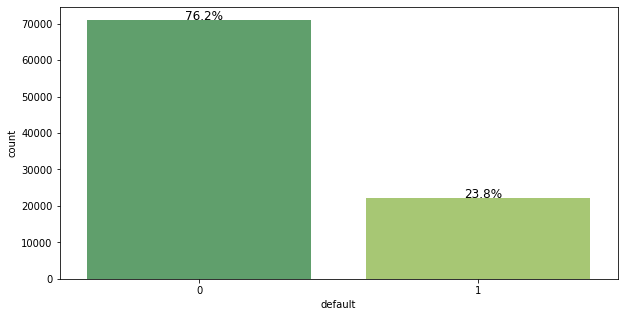

In [12]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(dftr["default"], palette="summer")
perc_on_bar(ax, dftr["default"])

our data shows that less than 1/4 of the customers defaulted on the loan.

Bivatariate on training file

Split Training CV into Test and Training Set

In [13]:
X = dftr.drop(columns="default")
Y = dftr["default"]

In [14]:
X.iloc[:,np.where(dftr.dtypes == "object")[0]] = X.iloc[:,np.where(dftr.dtypes == "object")[0]].astype(str)


In [15]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(65221, 22) (27953, 22)


Training has 65,221 line items and 22 columns while the test has 27,953 line items and 22 columns.

In [16]:
CBC = CatBoostClassifier()
CBC.fit(X_train, y_train, eval_set = (X_test,y_test),cat_features = np.where(dftr.dtypes == "object")[0])

Learning rate set to 0.088933
0:	learn: 0.6244969	test: 0.6253875	best: 0.6253875 (0)	total: 216ms	remaining: 3m 35s
1:	learn: 0.5707709	test: 0.5726199	best: 0.5726199 (1)	total: 364ms	remaining: 3m 1s
2:	learn: 0.5284349	test: 0.5306932	best: 0.5306932 (2)	total: 506ms	remaining: 2m 48s
3:	learn: 0.4851962	test: 0.4884334	best: 0.4884334 (3)	total: 667ms	remaining: 2m 46s
4:	learn: 0.4513466	test: 0.4554278	best: 0.4554278 (4)	total: 836ms	remaining: 2m 46s
5:	learn: 0.4237343	test: 0.4282532	best: 0.4282532 (5)	total: 989ms	remaining: 2m 43s
6:	learn: 0.4046952	test: 0.4095724	best: 0.4095724 (6)	total: 1.15s	remaining: 2m 43s
7:	learn: 0.3911551	test: 0.3964130	best: 0.3964130 (7)	total: 1.3s	remaining: 2m 40s
8:	learn: 0.3767780	test: 0.3823220	best: 0.3823220 (8)	total: 1.46s	remaining: 2m 40s
9:	learn: 0.3630173	test: 0.3688943	best: 0.3688943 (9)	total: 1.61s	remaining: 2m 39s
10:	learn: 0.3502017	test: 0.3563288	best: 0.3563288 (10)	total: 1.79s	remaining: 2m 41s
11:	learn: 0.

In [17]:
import sklearn

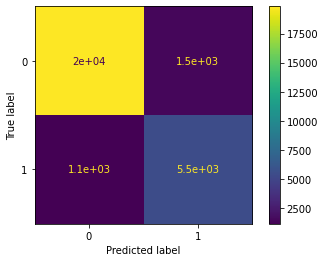

In [18]:
sklearn.metrics.plot_confusion_matrix(CBC,X_test, y_test)

As we can see, the model is accurate as ratio appears to show that most didn't default.

In [19]:
from sklearn.metrics import plot_roc_curve

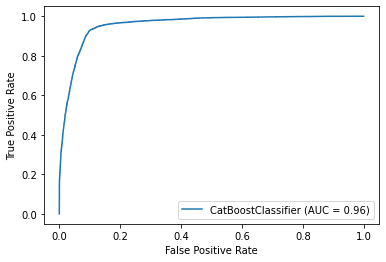

In [20]:
plot_roc_curve(CBC,X_test,y_test)

AUC is .96 which means model is highly accurate.

In [21]:
dfts.iloc[:,np.where(dfts.dtypes == "object")[0]] = dfts.iloc[:,np.where(dfts.dtypes == "object")[0]].astype(str)

In [22]:
CBC.score(X_test,y_test)

0.9065216613601402

Accuracy score using cat boost on training set is 90.67%

In [23]:
submission = dfts[["ID"]]
submission["default"] = CBC.predict(dfts)
submission.to_csv("sub.csv",index=False)

In [44]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [45]:
model = CatBoostClassifier()

In [41]:
dfts.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64

In [39]:
dftr.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [38]:
dftr.fillna(dftr.mean(),inplace = True)

dftr["job_experience"] = dftr.job_experience.fillna(dftr.job_experience.value_counts().index[0])
print(f"Imputation done. Missing values: {dftr.job_experience.isnull().sum()}")

Imputation done. Missing values: 0


In [40]:
dfts.fillna(dftr.mean(),inplace = True)


In [42]:
dftr = pd.get_dummies(dftr, columns=["loan_term","loan_grade","loan_subgrade","job_experience","home_ownership","income_verification_status","loan_purpose","state_code","application_type"])

In [43]:
dfts = pd.get_dummies(dfts, columns=["loan_term","loan_grade","loan_subgrade","job_experience","home_ownership","income_verification_status","loan_purpose","state_code","application_type"])

In [49]:
X2 = dftr.drop(columns="default")
Y2 = dftr["default"]

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, Y2, test_size=0.30, random_state=1, stratify=Y
)
print(X_train2.shape, X_test2.shape)

(65221, 124) (27953, 124)


In [51]:
rsr = model.randomized_search(grid,X_train2,y_train2,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
21:	learn: 0.2817253	test: 0.2875679	best: 0.2875679 (21)	total: 713ms	remaining: 31.7s
22:	learn: 0.2786770	test: 0.2842404	best: 0.2842404 (22)	total: 744ms	remaining: 31.6s
23:	learn: 0.2771639	test: 0.2828047	best: 0.2828047 (23)	total: 774ms	remaining: 31.5s
24:	learn: 0.2750389	test: 0.2804832	best: 0.2804832 (24)	total: 802ms	remaining: 31.3s
25:	learn: 0.2735189	test: 0.2791694	best: 0.2791694 (25)	total: 831ms	remaining: 31.1s
26:	learn: 0.2722085	test: 0.2779071	best: 0.2779071 (26)	total: 860ms	remaining: 31s
27:	learn: 0.2696768	test: 0.2752517	best: 0.2752517 (27)	total: 889ms	remaining: 30.9s
28:	learn: 0.2679930	test: 0.2737211	best: 0.2737211 (28)	total: 941ms	remaining: 31.5s
29:	learn: 0.2665244	test: 0.2722744	best: 0.2722744 (29)	total: 970ms	remaining: 31.4s
30:	learn: 0.2648546	test: 0.2704747	best: 0.2704747 (30)	total: 997ms	remaining: 31.2s
31:	learn: 0.2640359	test: 0.2697517	best: 0.2697517 (31)	total: 1.03s	

In [65]:
rsr

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [77]:
import catboost as cb
cbc3 = CatBoostClassifier(depth=6, l2_leaf_reg=9, learning_rate = 0.1)

In [70]:
dftr.dtypes

ID                               int64
loan_amnt                        int64
interest_rate                  float64
annual_income                  float64
debt_to_income                 float64
                                ...   
state_code_WI                    uint8
state_code_WV                    uint8
state_code_WY                    uint8
application_type_INDIVIDUAL      uint8
application_type_JOINT           uint8
Length: 125, dtype: object

In [78]:
cbc3.fit(X_train2, y_train2, eval_set = (X_test2,y_test2))

0:	learn: 0.6086498	test: 0.6099718	best: 0.6099718 (0)	total: 33.2ms	remaining: 33.2s
1:	learn: 0.5484686	test: 0.5504645	best: 0.5504645 (1)	total: 64.9ms	remaining: 32.4s
2:	learn: 0.5046105	test: 0.5072005	best: 0.5072005 (2)	total: 96ms	remaining: 31.9s
3:	learn: 0.4609343	test: 0.4641191	best: 0.4641191 (3)	total: 129ms	remaining: 32.2s
4:	learn: 0.4324665	test: 0.4363717	best: 0.4363717 (4)	total: 162ms	remaining: 32.3s
5:	learn: 0.4028380	test: 0.4073235	best: 0.4073235 (5)	total: 195ms	remaining: 32.2s
6:	learn: 0.3823402	test: 0.3873277	best: 0.3873277 (6)	total: 228ms	remaining: 32.3s
7:	learn: 0.3678330	test: 0.3733580	best: 0.3733580 (7)	total: 265ms	remaining: 32.9s
8:	learn: 0.3529943	test: 0.3590277	best: 0.3590277 (8)	total: 297ms	remaining: 32.7s
9:	learn: 0.3418287	test: 0.3483402	best: 0.3483402 (9)	total: 333ms	remaining: 33s
10:	learn: 0.3341850	test: 0.3409941	best: 0.3409941 (10)	total: 365ms	remaining: 32.9s
11:	learn: 0.3267139	test: 0.3336351	best: 0.3336351 

In [79]:
cbc3.score(X_test2,y_test2)

0.9058777233212894

In [81]:
df_svm = pd.read_csv("tr.csv")
train_set_svc, test_set_svc = train_test_split(df_svm, test_size = 0.2, random_state = 42)
X_train_svc = train_set_svc.drop(['default'], axis = 1)
y_train_svc = train_set_svc['default']
X_test_svc = test_set_svc.drop(['default'], axis = 1)
y_test_svc = test_set_svc['default']

In [ ]:
zscore_svc = StandardScaler()
features_names = X_train_svc.columns
X_train_svc = zscore_svc.fit_transform(X_train_svc)
X_train_svc = pd.DataFrame(X_train_svc, columns = features_names)
X_test_svc = zscore_svc.transform(X_test_svc)
X_test_svc = pd.DataFrame(X_test_svc, columns = features_names)

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [1]:
svc = SVC(random_state=42, class_weight='balanced',probability=True, verbose=True)
parameters = {'C':[0.1, 1, 10]}
rlf_svc = RandomizedSearchCV(svc, parameters, cv = 5).fit(X_train2, y_train2)
rlf_svc.score

NameError: ignored